# Disicplina: Ciência de Dados
## Pacote Sklearn - Métricas e Processamento

Prof. Luiz Affonso Guedes

## Conteúdo:
- Validação cruzada.
- Métricas para avaliação de algoritmos de aprendizagem de máquinas.
    - Matriz de confusão.
- Normalização de dados
- Missing Data

### 1. Divisão dos dados para Treinamento e Validação
- Dividir os dados em conjunto de treinamento e conjunto de teste/validação.
- Treinar o modelo com os dados do conjunto de treinamento e validar/predizer com dados do conjunto de teste.
- Os dados podem não ser representativos o suficiente para que o modelo posso ter boa generalização.
- Há várias técnicas de validação para do treinamento
    - Amostragem Aleatória
    - Valiadação Cruzada
    - Bootstrap

- Amostragem Aleatória

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,        random_state=42, stratify=y)

- A técnica de Validação Cruzada é uma das utilizada.

scores = cross_val_score(modelo,X,y, cv=3)


In [1]:
# Importação de Pacotes

# Pacote scikitlearn (classe datasets)
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Problema de super especialização

- escolha de parâmetros do algoritmo de aprendizagem
- Exemplo do algoritmo K-NN

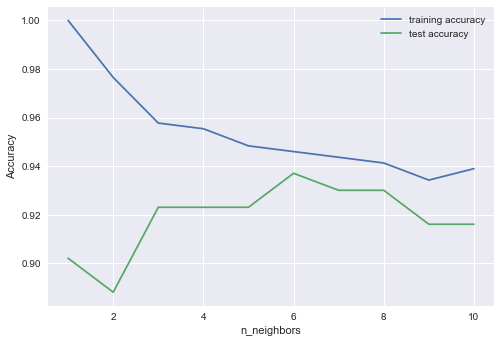

In [163]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

#### Técnicas de Validação e Amostragem dos conjuntos de treino e teste

In [79]:
# Exemplo com Validação por Amostragem Aleatória

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
knn = KNeighborsClassifier(n_neighbors=5)


X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)


knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [164]:
# Exemplo com Validação Cruzada

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
knn = KNeighborsClassifier(n_neighbors=5)

#knn.fit(iris.data, iris.target)

scores = cross_val_score(knn, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.98039216  0.98039216  1.        ]


In [18]:
# Exemplo com Validação Cruzada
# Definindo o número de Folds (cv) - o padrão é cv=3

scores = cross_val_score(knn, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96666667  1.          0.96666667  0.96666667  1.        ]


### 2. Métricas para Avaliação de Desempenho de Classificadores
- Taxa de Acerto
- Acurácia
- Precisão
- Recall
- Matriz de Confusão

In [166]:
# Exemplo de métricas de avaliação de classificadores

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.5, random_state=0)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [167]:
y_pred1 = knn.fit(X_train, y_train).predict(X_test)
print(y_pred - y_pred1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [168]:
# Calculando a Acurácia

from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.90666666666666662

In [62]:
# Obtendo a Matriz de Confusão
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[21  0  0]
 [ 0 28  2]
 [ 0  5 19]]


In [54]:
# Geração de relatório

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       0.85      0.93      0.89        30
          2       0.90      0.79      0.84        24

avg / total       0.91      0.91      0.91        75



Plote da Matriz de Confusão com recursos do Seaborn.

In [169]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/Users/Guedes/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/Guedes/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


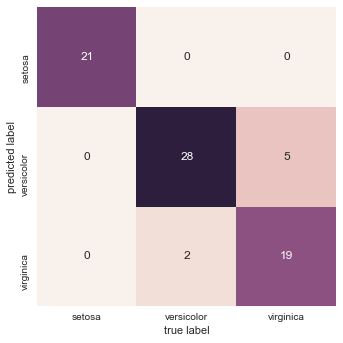

In [170]:
from sklearn.metrics import confusion_matrix

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 3. Normalização de Dados

- Refazendo o exemplo de classificação do dataset Iris com K-NN.

In [82]:
# Normalização com valores padrões
from sklearn.preprocessing import scale

# X_scaled = scale(X, axis=0, with_mean=True, with_std=True, copy=True)
X_scaled = scale(X)
np.mean(X), np.std(X)

(3.4636666666666662, 1.974000985027335)

In [70]:
np.mean(X_scaled), np.std(X_scaled)

(-1.3263464400855204e-15, 1.0)

In [171]:
# Divisão dos dados e treinamento com dados escalonados

knn_scaled = KNeighborsClassifier(n_neighbors=1)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,
                                test_size=0.5, random_state=0)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)


In [98]:
print("Test set score : {:.2f}".format(knn.score(X_test, y_test)))

Test set score : 0.91


In [99]:
print("Test set score: {:.2f}".format(knn_scaled.score(X_test_scaled, y_test)))

Test set score: 0.91


### Exercício - dataset Breast_cancer


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# load and split the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# compute minimum and maximum on the training data
scaler = MinMaxScaler().fit(X_train)

# rescale the training data
X_train_scaled = scaler.transform(X_train)


In [ ]:
# Complete o exercício com treinamento com o algoritmo K-NN
knn2 = ???


In [ ]:

# learn an SVM on the scaled training data
knn2.fit(X_train_scaled, y_train)
# scale the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(knn2.score(X_test_scaled, y_test)))

### 4. Missing Data
- Tratar missing data é uma tarefa básica em análise de dados.
- O SciKitLearn possui uma classe para tratar missing data.
    - from sklearn.preprocessing import Imputer


In [172]:
from numpy import nan
X = np.array([[ nan, 0, 3 ],
[ 3, 7, 9 ],
[ 3, 5, 2 ],
[ 4, nan, 6 ],
[ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

In [173]:
X

array([[ nan,   0.,   3.],
       [  3.,   7.,   9.],
       [  3.,   5.,   2.],
       [  4.,  nan,   6.],
       [  8.,   8.,   1.]])

In [174]:
y

array([14, 16, -1,  8, -5])

In [61]:
# Substitui os NaN pelos valores médios

from sklearn.preprocessing import Imputer
# imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = Imputer(strategy='mean')

X2 = imp.fit_transform(X)
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

### Exercício 
- Dados dos votos dos congressitas dos EUA - Base do exercício do aula anterior


In [10]:
# Leitura da base de dados

#dados1 = pd.read_csv('arquivo_congresso.txt', header = None)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [11]:
# Removing Missing data - Manual Way

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

0       0
1      12
2      48
3      11
4      11
5      15
6      11
7      14
8      15
9      22
10      7
11     21
12     31
13     25
14     17
15     28
16    104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [100]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


Exercício: continuação
- Use a classe Imputer

In [ ]:
# Leitura da base de dados

#dados1 = pd.read_csv('arquivo_congresso.txt', header = None)
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header = None)
df1.head()

In [ ]:
# Eliminando Missing data
from sklearn.preprocessing import Imputer

???


### 5. Pipelines
- O processo de pre-tratamento de dados pode se tornar rapidamente tedioso se for realizado à mão, especialmente se desejar encadear várias etapas. 
- Para tornar o pre-processmento dos dados mais automatizado, o SciKit-Learn possui uma classe pipeline:
    - from sklearn.pipeline import make_pipeline


#### 5.1. Missing Data in a Pipeline


In [182]:
# Iris dataset

X = iris.data
y = iris.target

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

# imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
knn1 = KNeighborsClassifier(n_neighbors=3)


steps = [('imputation', imp), ('knn', knn1)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [186]:
# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

print(pipeline.score(X_test, y_test))


1.0


In [187]:
# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



#### 5.2. Scaling Data in a Pipeline

In [188]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 1.0
Accuracy without Scaling: 1.0


#### 5.3. CV and scaling in a pipeline

In [189]:
from sklearn.model_selection import GridSearchCV

steps2 = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]   

pipeline2 = Pipeline(steps2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)



#n_neighbors
parameters = {'knn__n_neighbors': [1,3,5,7,9]}
cv = GridSearchCV(pipeline2, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [190]:
print(cv.best_params_)

{'knn__n_neighbors': 3}


In [157]:
print(cv.score(X_test, y_test))

0.966666666667


In [191]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.92      0.96        12
          2       0.88      1.00      0.93         7

avg / total       0.97      0.97      0.97        30



Exemplo com classificador SVM

In [134]:
# Exemplo com classificador SVM

from sklearn.svm import SVC

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9333333333333333
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.83      0.91        12
          2       0.78      1.00      0.88         7

avg / total       0.95      0.93      0.93        30

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}
